In [5]:
import matplotlib.pyplot as plt
import pandas as pandas
import yfinance as yf
import random
import torch
import sys
sys.path.append("..")

from src.load_data import LoadData
from src.populate_dataframe import ProcessData

In [4]:
ticker_symbol = "AAPL"
start_date = "2020-01-01"
end_date = "2020-12-31"
filename = f"{ticker_symbol}_{start_date}_{end_date}"

df = pandas.read_csv(f"../data/processed/{filename}.csv")

In [55]:
window_size = 30
starting_portfolio = 10000
portfolio = starting_portfolio
pos = 50

action = [+1, 0, -1]

while pos < len(df):
    window = df.iloc[pos-30:pos]
    current_action = random.choice(action)
    reward = current_action * df.iloc[pos]["Return"]
    portfolio += portfolio*reward
    pos+=1

print(portfolio)

11550.368301354247


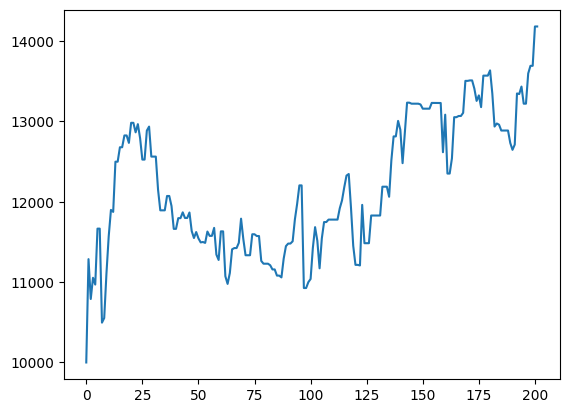

In [ ]:
class TradingEnvironment:
    def __init__(self,df,window_size=30,starting_portfolio=10000):
        self.df = df
        self.window_size = window_size
        self.starting_portfolio = starting_portfolio
        self.portfolio_list = []

    def BuyAndHold(self):
        
        self.daily_return =  self.df.iloc[self.pos]["Return"]
        self.reward = action * self.daily_return
        self.portfolio *= 1 + self.reward

    def reset(self):
        self.done = False
        self.portfolio = self.starting_portfolio
        self.action = 0
        self.pos = max(self.window_size,50)
        self.state = self.df.iloc[pos-30:pos]

        return self.state

    def step(self,action):
        self.portfolio_list.append(self.portfolio)
        self.daily_return =  self.df.iloc[self.pos]["Return"]
        self.reward = action * self.daily_return
        self.portfolio *= 1 + self.reward
        self.pos += 1

        if self.pos >= len(df):
            self.done = True

        self.state = self.df.iloc[pos-30:pos]
        return self.state, self.reward, self.done

env = TradingEnvironment(df)
state = env.reset()

while env.done == False:
    action = random.choice([-1,0,+1])
    state, reward, done = env.step(action)

plt.plot(env.portfolio_list)
plt.show()